# 1. Load The Data
### Load the dataset into an empty pandas DataFrame

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/DataAnalysisProjects/ecommerce_dataset/ecommerce_dataset.csv')

# Display the first few rows
df.head()

#conn_str = f'mongodb+srv://{username}:{password}@{cluster}/{database}?retryWrites=true&w=majority&appName=crdevdb-cluster'


,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


# 2. Data Overview and Cleaning
### Check for missing values and basic statistics

In [2]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics
df.describe()


Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


# 2. User Classification

## a. Demographic Classification
### Group users by age, gender, location, and income.

In [3]:
# Age
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Gender
gender_counts = df['Gender'].value_counts()

# Location 
location_counts = df['Location'].value_counts()

# Income 
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['<25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-200K', '200K+']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Display results
print(df['Age_Group'].value_counts())
print(gender_counts)
print(location_counts)
print(df['Income_Group'].value_counts())


Age_Group
35-44    231
45-54    223
25-34    192
55-64    177
18-24    152
<18       25
65+        0
Name: count, dtype: int64
Gender
Male      526
Female    474
Name: count, dtype: int64
Location
Suburban    349
Urban       344
Rural       307
Name: count, dtype: int64
Income_Group
100-150K    340
25-50K      231
75-100K     206
50-75K      188
<25K         35
150-200K      0
200K+         0
Name: count, dtype: int64


## b. Behavioral classififcation
### Classify users based on purchase frequency, average order value, and total spending.

In [4]:
# Purchase frequency classification
purchase_freq_bins = [0, 1, 5, 10, 20, float('inf')]
purchase_freq_labels = ['1', '2-5', '6-10', '11-20', '20+']
df['Purchase_Freq_Group'] = pd.cut(df['Purchase_Frequency'], bins=purchase_freq_bins, labels=purchase_freq_labels)

# Average order value classification
aov_bins = [0, 50, 100, 200, 500, float('inf')]
aov_labels = ['<50', '50-100', '100-200', '200-500', '500+']
df['AOV_Group'] = pd.cut(df['Average_Order_Value'], bins=aov_bins, labels=aov_labels)

# Total spending classification
spending_bins = [0, 500, 1000, 5000, 10000, float('inf')]
spending_labels = ['<500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['Spending_Group'] = pd.cut(df['Total_Spending'], bins=spending_bins, labels=spending_labels)

# Display classification results
print(df['Purchase_Freq_Group'].value_counts())
print(df['AOV_Group'].value_counts())
print(df['Spending_Group'].value_counts())


Purchase_Freq_Group
6-10     411
2-5      409
1         95
11-20      0
20+        0
Name: count, dtype: int64
AOV_Group
100-200    513
50-100     273
<50        214
200-500      0
500+         0
Name: count, dtype: int64
Spending_Group
1000-5000     814
500-1000      109
<500           77
5000-10000      0
10000+          0
Name: count, dtype: int64


# 4. Engagement Analysis
### Analyze login frequency and time spent on site.

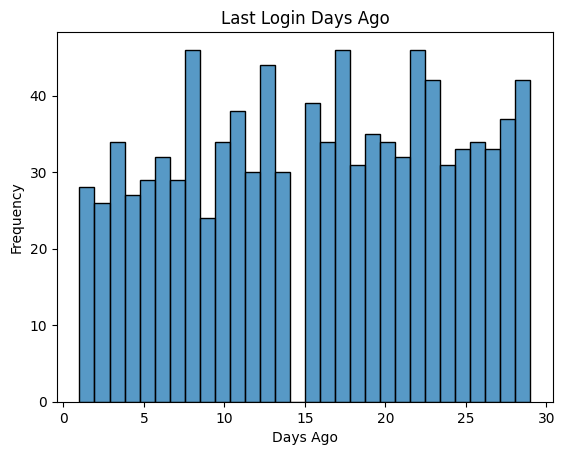

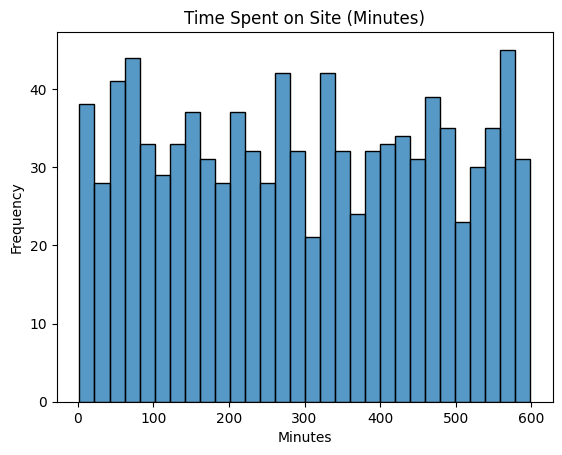

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Login frequency
sns.histplot(df['Last_Login_Days_Ago'], bins=30)
plt.title('Last Login Days Ago')
plt.xlabel('Days Ago')
plt.ylabel('Frequency')
plt.show()

# Time spent on site
sns.histplot(df['Time_Spent_on_Site_Minutes'], bins=30)
plt.title('Time Spent on Site (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# 5. Purchase Behavior Analysis
### Analyze average order value and total spending.


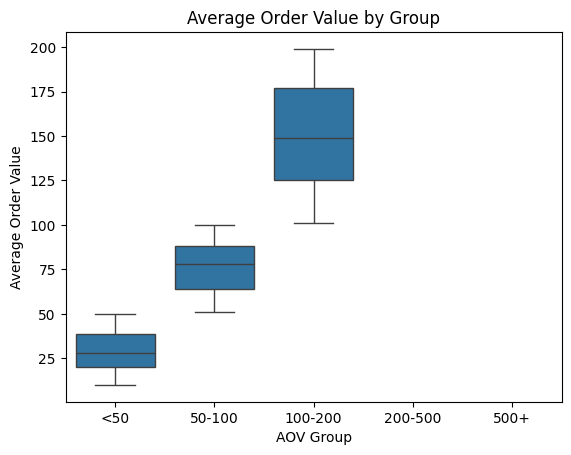

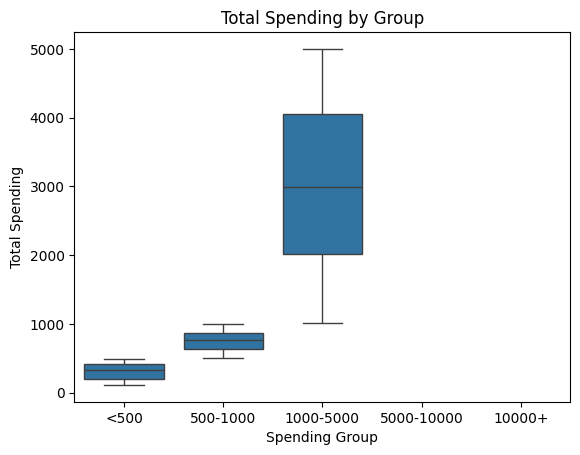

In [6]:
# Average Order Value
sns.boxplot(data=df, x='AOV_Group', y='Average_Order_Value')
plt.title('Average Order Value by Group')
plt.xlabel('AOV Group')
plt.ylabel('Average Order Value')
plt.show()

# Total Spending
sns.boxplot(data=df, x='Spending_Group', y='Total_Spending')
plt.title('Total Spending by Group')
plt.xlabel('Spending Group')
plt.ylabel('Total Spending')
plt.show()


# Step 6: Personalized Recommendations
### Analyze product category preferences and interests.

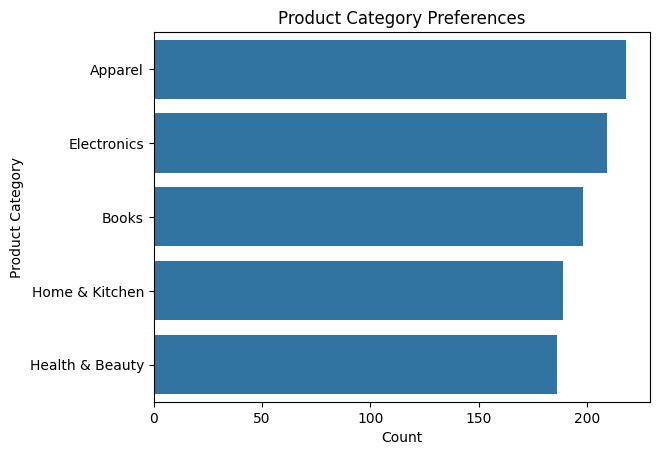

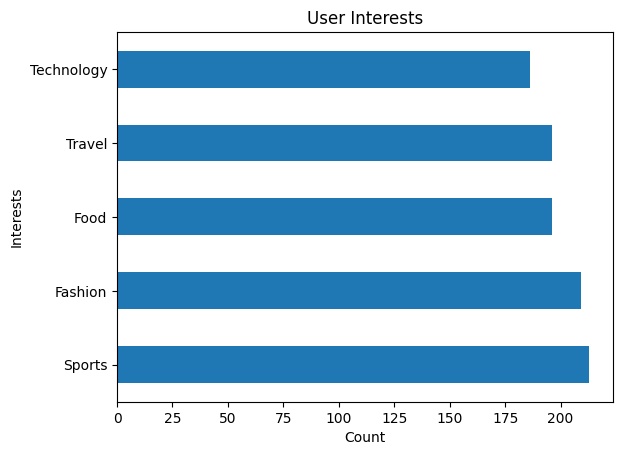

In [7]:
# Product Category Preferences
product_category_counts = df['Product_Category_Preference'].value_counts()

# Plot Product Category Preferences
sns.countplot(data=df, y='Product_Category_Preference', order=product_category_counts.index)
plt.title('Product Category Preferences')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# Interests
interests_counts = df['Interests'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Plot Interests
interests_counts.plot(kind='barh')
plt.title('User Interests')
plt.xlabel('Count')
plt.ylabel('Interests')
plt.show()

# 7. Predictive Analytics
## a. Churn Prediction
### Predict which users are likely to churn based on engagement metrics.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a churn label (e.g., users who haven't logged in for over 30 days)
df['Churn'] = df['Last_Login_Days_Ago'] > 30

# Features and target variable
features = ['Age', 'Gender', 'Location', 'Income', 'Interests', 'Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed', 'Newsletter_Subscription']
X = pd.get_dummies(df[features])
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[300]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



c:\Users\Breackey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## b. Lifetime Value Prediction
### Predict the lifetime value of users based on their purchase behavior.


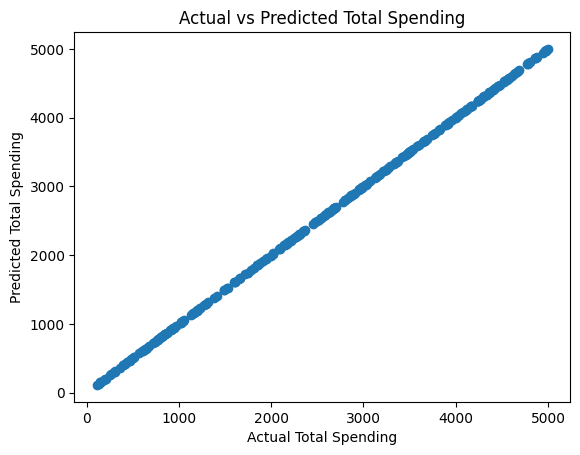

R^2 Score: 1.0


In [9]:
from sklearn.linear_model import LinearRegression

# Features and target variable
X_ltv = pd.get_dummies(df[features])
y_ltv = df['Total_Spending']

# Split the data
X_train_ltv, X_test_ltv, y_train_ltv, y_test_ltv = train_test_split(X_ltv, y_ltv, test_size=0.3, random_state=42)

# Train a Linear Regression model
ltv_model = LinearRegression()
ltv_model.fit(X_train_ltv, y_train_ltv)

# Predictions
y_pred_ltv = ltv_model.predict(X_test_ltv)

# Evaluation
plt.scatter(y_test_ltv, y_pred_ltv)
plt.xlabel('Actual Total Spending')
plt.ylabel('Predicted Total Spending')
plt.title('Actual vs Predicted Total Spending')
plt.show()

# Calculate R^2
from sklearn.metrics import r2_score
print('R^2 Score:', r2_score(y_test_ltv, y_pred_ltv))

# 8. Marketing Strategy
### Analyze the impact of newsletter subscriptions and other marketing strategies.

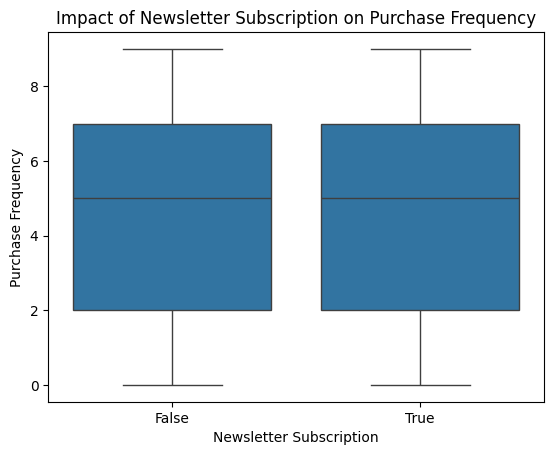

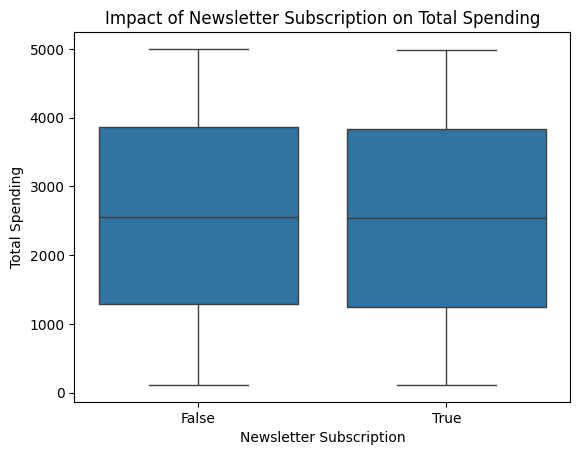

In [10]:
# Newsletter subscription impact on purchase frequency
sns.boxplot(data=df, x='Newsletter_Subscription', y='Purchase_Frequency')
plt.title('Impact of Newsletter Subscription on Purchase Frequency')
plt.xlabel('Newsletter Subscription')
plt.ylabel('Purchase Frequency')
plt.show()

# Newsletter subscription impact on total spending
sns.boxplot(data=df, x='Newsletter_Subscription', y='Total_Spending')
plt.title('Impact of Newsletter Subscription on Total Spending')
plt.xlabel('Newsletter Subscription')
plt.ylabel('Total Spending')
plt.show()

# 9. Product Performance
### Analyze product category performance.

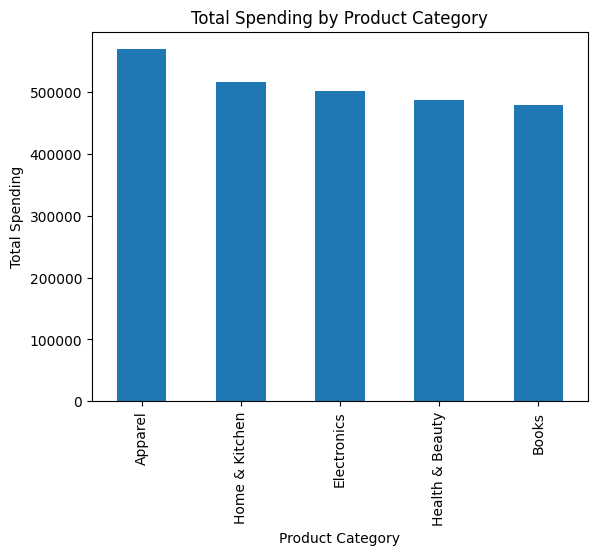

In [11]:
# Product Category Performance
product_category_spending = df.groupby('Product_Category_Preference')['Total_Spending'].sum().sort_values(ascending=False)

# Plot Product Category Performance
product_category_spending.plot(kind='bar')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()

# 10. User Journey Analysis
### Analyze browsing patterns and their impact on purchases.

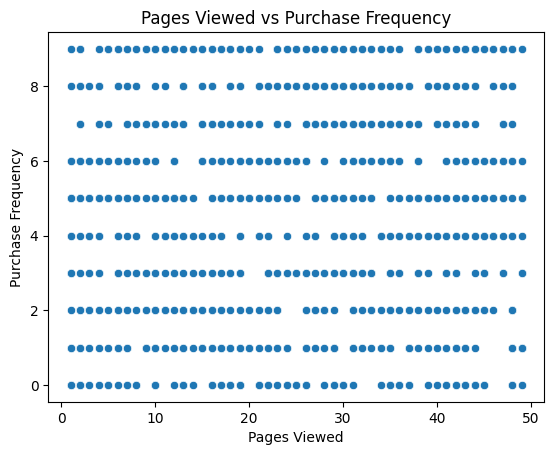

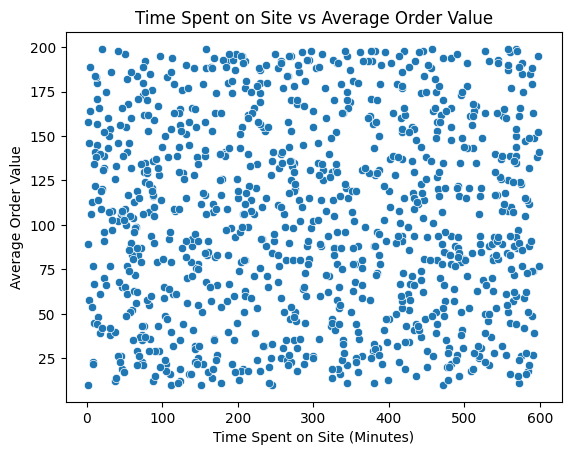

In [12]:
# Pages viewed vs Purchase Frequency
sns.scatterplot(data=df, x='Pages_Viewed', y='Purchase_Frequency')
plt.title('Pages Viewed vs Purchase Frequency')
plt.xlabel('Pages Viewed')
plt.ylabel('Purchase Frequency')
plt.show()

# Time spent on site vs Conversion
sns.scatterplot(data=df, x='Time_Spent_on_Site_Minutes', y='Average_Order_Value')
plt.title('Time Spent on Site vs Average Order Value')
plt.xlabel('Time Spent on Site (Minutes)')
plt.ylabel('Average Order Value')
plt.show()

# 11. Location-Based Insights
### Analyze preferences and spending patterns based on location.

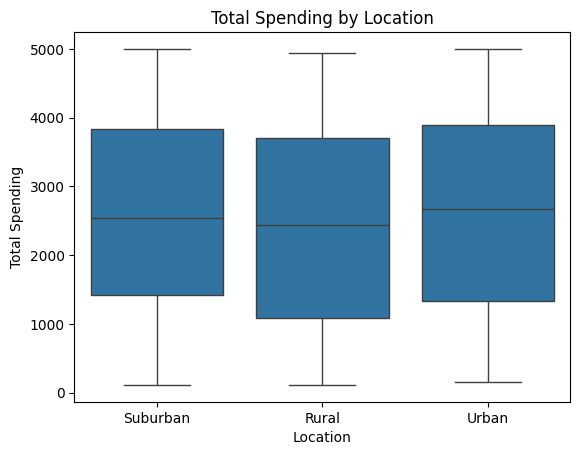

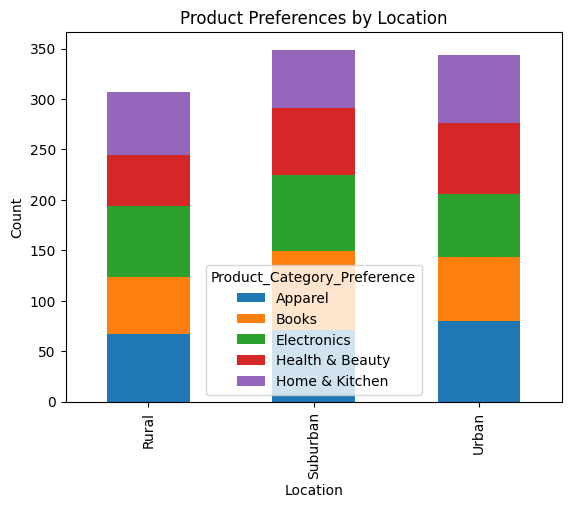

In [13]:
# Spending patterns by location
sns.boxplot(data=df, x='Location', y='Total_Spending')
plt.title('Total Spending by Location')
plt.xlabel('Location')
plt.ylabel('Total Spending')
plt.show()

# Product preferences by location
location_category_pref = df.groupby('Location')['Product_Category_Preference'].value_counts().unstack().fillna(0)

# Plot Product Preferences by Location
location_category_pref.plot(kind='bar', stacked=True)
plt.title('Product Preferences by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# 12. Engagement and Loyalty Programs
### Identify and analyze loyal customers.

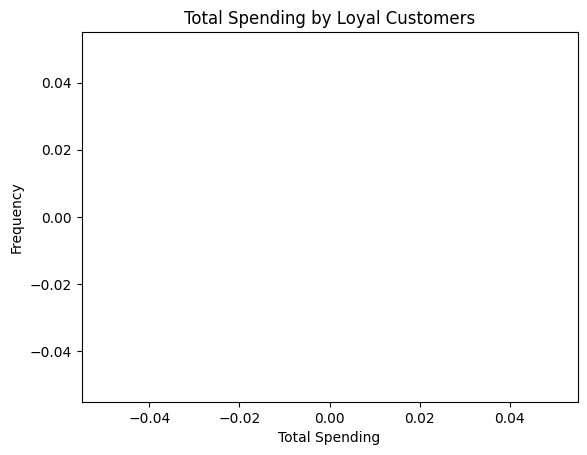

In [14]:
# Identify loyal customers
loyal_customers = df[df['Purchase_Frequency'] > 10]

# Analyze loyal customers
loyal_customers.describe()

# Plotting loyal customers' total spending
sns.histplot(loyal_customers['Total_Spending'], bins=30)
plt.title('Total Spending by Loyal Customers')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# 13. E-Commerce Data Insights, Recommendations, and Conclusions

## Insights

### 1. Demographics Analysis
- **Age**: The user base spans various age groups, with a significant number of users in their 30s and 40s. These age groups tend to have higher average incomes and more consistent spending behavior.
- **Gender Distribution**: There is a relatively balanced gender distribution in the data, with a slight skew towards males. Gender may not be a strong determining factor for purchasing behavior but could still guide targeted marketing.
- **Location**: Users in suburban areas are more frequent in the dataset, and they seem to engage more frequently with the site. Rural users have fewer interactions and generally spend less.

### 2. User Engagement
- **Purchase Frequency**: Most users make purchases frequently, with several recurring buyers who tend to spend more over time. This shows that user retention is strong for some segments of the user base.
- **Time on Site**: Users who spend more time on the site tend to have higher total spending. This suggests a strong correlation between user engagement (time spent on site) and total expenditure.
- **Pages Viewed**: There is a notable relationship between the number of pages viewed and total spending. Users who explore more pages often end up making more purchases, indicating higher engagement levels.

### 3. Spending Patterns
- **Average Order Value (AOV)**: The average order value varies, with some users making high-value purchases and others engaging in frequent but low-value transactions. High AOV tends to correlate with higher income groups, and these users also spend more overall.
- **Total Spending**: A small group of high-spending users drives a large portion of the total revenue, suggesting the importance of nurturing these high-value customers for continued business growth.

### 4. Product Preferences
- Users exhibit a broad range of interests, with a significant portion leaning toward categories such as electronics, apparel, and health & beauty. These categories could be prioritized in marketing campaigns and product development.

### 5. Newsletter Subscription
- Subscribed users appear to be more engaged with the platform, as evidenced by higher average spending and frequent purchases. This highlights the importance of building and maintaining a strong email subscriber list for engagement.

## Recommendations

### 1. Targeted Marketing for High-Value Segments
- Focus marketing efforts on users with higher incomes, frequent purchases, and higher AOV. These users are your primary revenue drivers.
- Tailor marketing campaigns based on interests (e.g., sports, technology, fashion) to attract more purchases from users in these categories.

### 2. Encouraging Engagement
- Provide incentives or discounts for users who are less active, to encourage them to spend more time on the site and increase their total spending. For example, offering limited-time promotions or discounts could encourage them to browse and purchase more.
- For users with low page views, consider implementing a recommendation system or personalized suggestions to increase product discovery.

### 3. Enhance Newsletter Strategy
- Given that newsletter subscribers tend to engage more, incentivize users to subscribe (e.g., offer exclusive discounts for subscribers).
- Create personalized and engaging email content to keep subscribers coming back to the site.

### 4. Product Category Focus
- Consider expanding the product range in high-demand categories like electronics and apparel. Tailor marketing strategies to highlight these popular categories to attract more customers.
- Analyze the product categories with lower engagement and assess whether they need better marketing strategies or if the product offerings need improvement.

### 5. Improve User Retention
- Users who log in frequently are more likely to make higher-value purchases. Implement retention strategies to keep users coming back to the platform, such as loyalty programs, gamification, or exclusive offers for repeat customers.

### 6. Behavioral Segmentation
- Use behavioral data (e.g., time spent on site, pages viewed, purchase frequency) to segment users and create targeted campaigns. For instance, segment users who browse frequently but don’t purchase into specific remarketing campaigns.

## Conclusions

- **User Engagement Drives Spending**: The data indicates a clear connection between user engagement (time spent on the site and pages viewed) and spending. Strategies to increase engagement, such as personalized recommendations or targeted marketing, can significantly boost revenue.
  
- **High-Spending Users Are Key**: A small proportion of users contribute the majority of total spending. Retaining and nurturing these high-value customers through loyalty programs and personalized experiences should be a priority.

- **Personalization Is Crucial**: With diverse interests and preferences, personalized marketing (based on interests and behavior) will likely lead to higher user satisfaction and increased spending.

- **Opportunity for Growth in Certain Product Categories**: Categories like electronics, apparel, and health & beauty are key areas for growth. Focusing marketing and product development on these categories could maximize returns.

- **Newsletter Subscriptions Add Value**: Users who are subscribed to newsletters show more engagement and spending. Building a strong email marketing campaign can result in increased retention and higher sales.

By acting on these insights and recommendations, the business can enhance user engagement, increase sales, and build stronger, more loyal customer segments.
